### Student-T v.s. Normal distribution

In [18]:
import tensorflow_probability.substrates.jax as tfp
import matplotlib.pyplot as plt
import seaborn as sns
import jax.numpy as jnp
import jax
%matplotlib inline

In [2]:
dist = tfp.distributions

In [3]:
st = dist.StudentT(df = 2, loc = 0., scale = 1)
normal = dist.Normal(loc = 0., scale = 1.)

(0.0, 0.45)

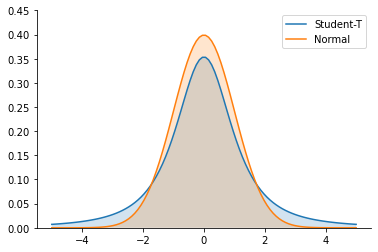

In [16]:
x = jnp.linspace(-5, 5, 100)
plt.plot(x, jnp.exp(st.log_prob(x)), label='Student-T')
plt.fill_between(x, jnp.exp(st.log_prob(x)), 0, alpha = 0.2)
plt.plot(x, jnp.exp(normal.log_prob(x)), label = 'Normal')
plt.fill_between(x, jnp.exp(normal.log_prob(x)), 0, alpha = 0.2)
sns.despine()
plt.legend()
plt.ylim((0.0, 0.45))

### Linear Regression with Student-T v/s Normal likelihood

In [124]:
import numpy as np
x_samples = np.linspace(-5, 5, 100)
f = 4*x_samples + 1
y = f + 2*np.random.randn(100)
y[20] = y[20] + 15
y[60] = y[60] + 20
#y = f.at[20].set(f[20] + 5)

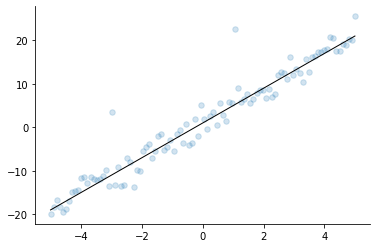

In [125]:
plt.plot(x_samples, f, lw = 1, color='k')
plt.scatter(x_samples, y, s=30, alpha=0.2)
sns.despine()

In [118]:
def pred_yhat(x, theta):
    return jnp.dot(x, theta[1:]) + theta[0]

In [153]:
def cost_normal(theta, x, y):
    f_hat = jnp.dot(x, theta[1:]) + theta[0]
    d = dist.Normal(f_hat, scale=1.)
    return -jnp.mean(d.log_prob(y))

def cost_student(theta, x, y):
    f_hat = jnp.dot(x, theta[1:]) + theta[0]
    d = dist.StudentT(2, f_hat, scale=1.)
    return -jnp.mean(d.log_prob(y))

In [154]:
dist.Normal(0., scale=1.).log_prob([5., 10., 0.])

DeviceArray([-13.418939 , -50.918938 ,  -0.9189385], dtype=float32)

In [155]:
theta_h = jnp.zeros(2)
theta_h = jnp.array([1., 1.])
cost_normal(theta_h, x_samples.reshape(-1,1), y), cost_student(theta_h, x_samples.reshape(-1,1), y)

(DeviceArray(43.102215, dtype=float32), DeviceArray(5.686528, dtype=float32))

In [156]:
for i in range(100):
    cost, theta_g = jax.value_and_grad(cost_normal)(theta_h, x_samples.reshape(-1,1), y)
    print(cost)
    theta_h = theta_g - 0.000001*theta_g
    print(theta_h)

43.102215
[ -0.3341135 -25.303679 ]
3651.1055
[  -1.6682274 -248.92899  ]
271898.34
[   -3.0023468 -2150.118    ]
19724438.0
[-4.3362994e+00 -1.8313412e+04]
1426271000.0
[-5.6699162e+00 -1.5572845e+05]
103093930000.0
[-6.9999928e+00 -1.3239864e+06]
7451514500000.0
[-8.3749914e+00 -1.1256138e+07]
538584700000000.0
[-9.999990e+00 -9.569605e+07]
3.8928076e+16
[-7.999992e+00 -8.135768e+08]
2.813663e+18
[ 6.3999935e+01 -6.9167662e+09]
2.0336729e+20
[ 2.5599974e+02 -5.8804101e+10]
1.469908e+22
[ 0.0000000e+00 -4.9993335e+11]
1.0624271e+24
[ 0.0000000e+00 -4.2502715e+12]
7.6790637e+25
[ 0.000000e+00 -3.613442e+13]
5.5503083e+27
[ 0.0000000e+00 -3.0720307e+14]
4.0116775e+29
[ 0.000000e+00 -2.611741e+15]
2.8995798e+31
[ 1.3421759e+08 -2.2204171e+16]
2.095772e+33
[ 2.1474815e+09 -1.8877259e+17]
1.5147913e+35
[ 0.0000000e+00 -1.6048835e+18]
inf
[ 1.37438814e+11 -1.36441971e+19]
inf
[ 0.0000000e+00 -1.1599852e+20]
inf
[-1.3194126e+13 -9.8618192e+20]
inf
[ 0.000000e+00 -8.384197e+21]
inf
[-5.629493

In [131]:
theta_h

DeviceArray([nan, nan], dtype=float32)

### TODO

1. Add all content from https://nipunbatra.github.io/blog/ml/2019/08/20/Gaussian-Processes.html
